In [1]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

X_word2vec_wlabels = np.load("Embedding array.npy")
X_word2vec_bi_wlabels = np.load("Embedding array_binary.npy")

In [2]:
X_word2vec = X_word2vec_wlabels[:][:, :-1]
labels_word2vec = X_word2vec_wlabels[:][:, -1]

X_word2vec_bi = X_word2vec_bi_wlabels[:][:, :-1]
labels_word2vec_bi = X_word2vec_bi_wlabels[:][:, -1]

In [30]:
X_word2vec = X_word2vec = X_word2vec[~np.all(X_word2vec == 0, axis=1)]

In [3]:
import pickle
import pandas as pd

with open('TF-IDF.txt', 'rb') as pickle_file:
    TFIDF = pickle.load(pickle_file)
    
X_TFIDF = np.array(TFIDF.todense()) 
labels_TFIDF = pd.read_pickle("clean_doc.pkl").iloc[:-1, :][2]

In [4]:
# labels_onehot = pd.read_pickle("clean_doc.pkl").iloc[:-1, :][2]
# X_onehot = pd.read_pickle("onehot_matrix")

In [5]:
encode = [("word2vec", X_word2vec, labels_word2vec, 5)]# ("word2vec binary", X_word2vec_bi, labels_word2vec_bi, 2), 
         # ("TF-IDF", X_TFIDF, labels_TFIDF, 5), ("One-hot", X_onehot, labels_onehot, 5)]

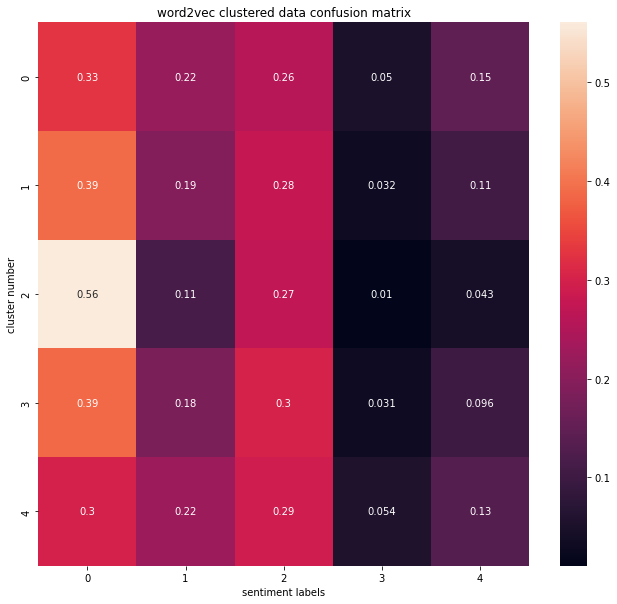

In [9]:
for i in range(len(encode)):
    
    fig, ax = plt.subplots(figsize=(11, 10))
    
    pre = encode[i]
    
    X = pre[1]
    labels = pre[2]
    num = pre[3]
    name = pre[0]
    
    kmeans = sklearn.cluster.KMeans(n_clusters=num).fit(X)
    kmeans_labels = kmeans.labels_
    
    matrix = confusion_matrix(labels, kmeans_labels, normalize='true')

    sns.heatmap(matrix, annot=True) 

    ax.set_xlabel('sentiment labels')
    ax.set_ylabel('cluster number')
    ax.set_title(name+" clustered data confusion matrix")
    
    plt.savefig("w2v_kmeans.png")

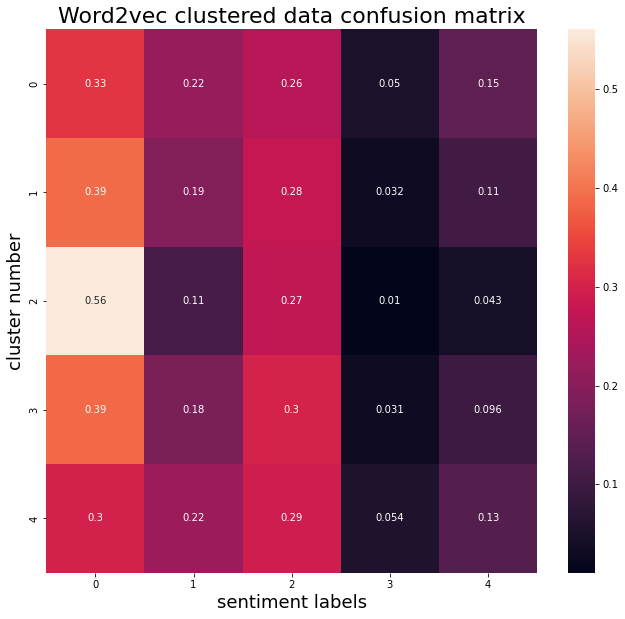

In [43]:
fig, ax = plt.subplots(figsize=(11, 10))

sns.heatmap(matrix, annot=True) 

ax.set_xlabel('sentiment labels', fontdict={'fontsize': 18, 'fontweight': 'roman'})
ax.set_ylabel('cluster number', fontdict={'fontsize': 18, 'fontweight': 'roman'})
ax.set_title("Word2vec clustered data confusion matrix", fontdict={'fontsize': 22, 'fontweight': 'roman'})

plt.savefig("w2v_kmeans.png")

In [27]:
dr = np.zeros([100, 300])
# dr2 = np.expand_dims(dr, axis=1)
# dr = dr[:, :, None]
# dr.shape
print(np.array(dr)[:, :, None])

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [33]:
# PCA = sklearn.decomposition.PCA(n_components=2)